In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.defaults)
reload(pcc.functions)

<module 'pycoco.functions' from '/Users/berto/Code/verbose-enigma/pycoco/functions.py'>

In [2]:
# sn = pcc.SNClass("SN2008D")
# sn.load_phot( path = '/Users/berto/Code/CoCo/data/lc/SN2008D.dat')
# sn.plot_lc()

In [3]:
sn = pcc.SNClass("SN2006aj")
sn.load_phot( path = '/Users/berto/Code/CoCo/data/lc/SN2006aj.dat')
sn.load_list("/Users/berto/Code/CoCo/lists/SN2006aj.list")
sn.load_spec()
sn.check_overlaps()

/Users/berto/Code/CoCo/data/lc/SN2006aj.dat


<IPython.core.display.Javascript object>


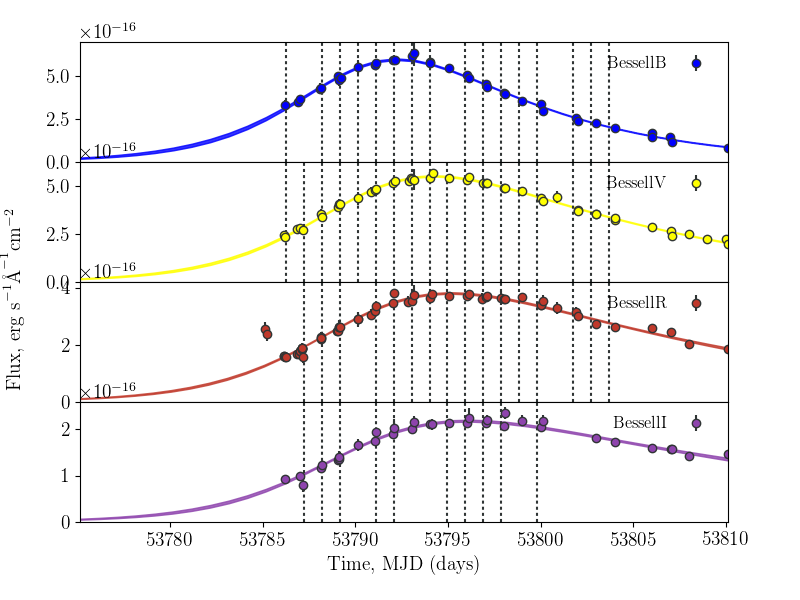

In [4]:
sn.get_lcfit("/Users/berto/Code/CoCo/recon/SN2006aj.dat")
sn.plot_lc()

<IPython.core.display.Javascript object>


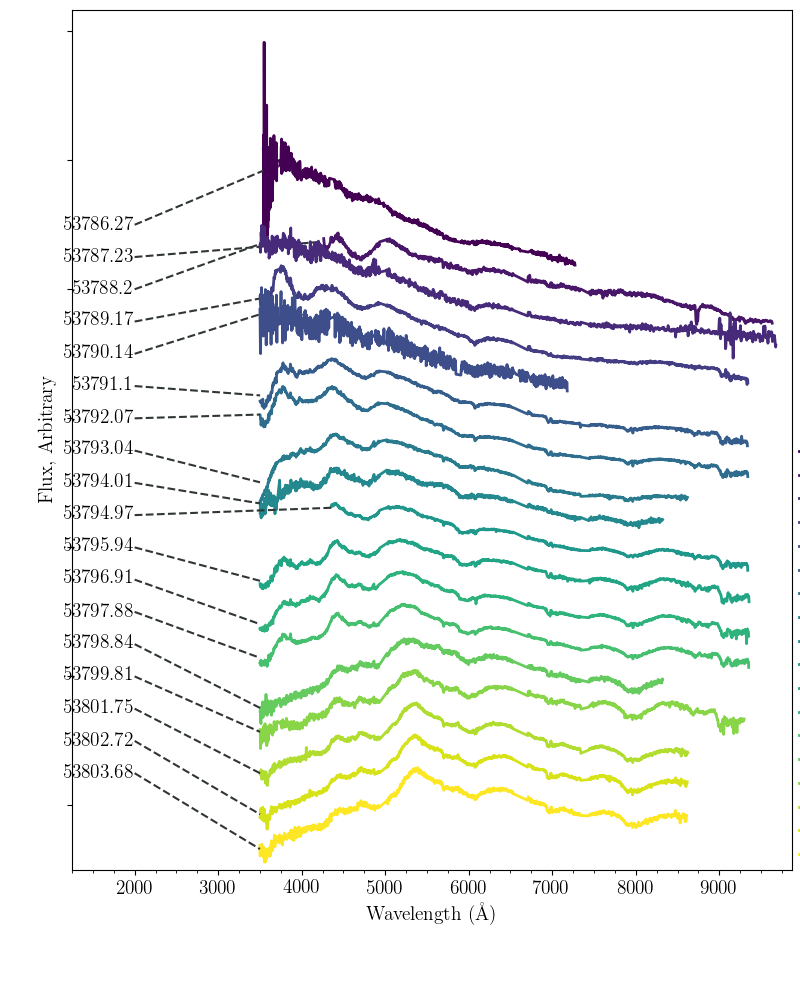

In [5]:
sn.plot_spec()

In [8]:
# sn._mangledspeclist
len(pcc.find_specphase_spec("SN2006aj", verbose = True))

/Users/berto/Code/CoCo/spectra
Found: 
['_50934.090000.spec' '_50936.070000.spec' '_50937.060000.spec'
 '_50940.040000.spec' '_50941.030000.spec' '_50942.020000.spec'
 '_50944.010000.spec' '_50945.990000.spec' '_50946.980000.spec'
 '_50948.960000.spec' '_50951.940000.spec' '_50953.920000.spec'
 '_50954.910000.spec' '_50955.900000.spec' '_50961.850000.spec'
 '_50964.830000.spec' '_50971.770000.spec' '_50987.640000.spec'
 '_50994.580000.spec' '_56460.070000.spec' '_56461.070000.spec'
 '_56462.060000.spec' '_56463.060000.spec' '_56464.050000.spec'
 '_56465.050000.spec' '_56467.040000.spec' '_56468.030000.spec'
 '_56469.030000.spec' '_56470.030000.spec' '_56471.020000.spec'
 '_56474.010000.spec' '_56476.990000.spec' '_56483.960000.spec'
 '_56495.910000.spec' '_56509.850000.spec' 'SN1993J_49084.000000.spec'
 'SN1993J_49092.000000.spec' 'SN1993J_49095.000000.spec'
 'SN1993J_49097.000000.spec' 'SN1993J_49098.000000.spec'
 'SN1993J_49100.000000.spec' 'SN1993J_49111.000000.spec'
 'SN1993J_49114

18

In [10]:
ls = os.listdir(pcc._default_specphase_dir_path)
snname = sn.name
spec_list = [i for i in ls if i[-5:] == ".spec"]
snmatch_list = [i for i in spec_list if i[:len(snname)] == snname ]

In [13]:
print(len(spec_list))
print(len(snmatch_list))

206
18


In [13]:
sn.load_mangledspec()

/Users/berto/Code/verbose-enigma/pycoco/functions.py:371: UserWarning: Something went wrong
  warnings.warn("Something went wrong")


TypeError: 'bool' object is not iterable

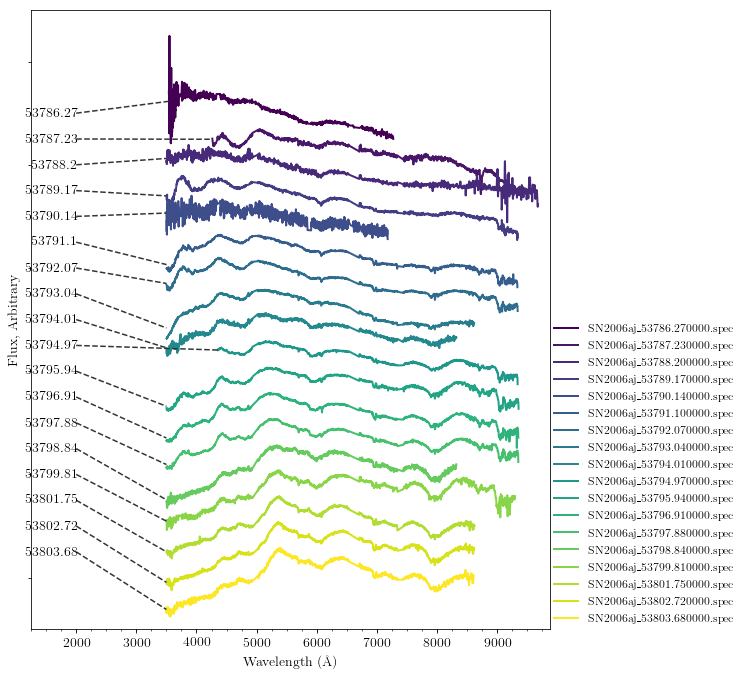

In [132]:
sn.plot_mangledspec()

In [133]:
pcc.find_specphase_spec("SN2006aj")

['SN2006aj_53786.270000.spec',
 'SN2006aj_53787.230000.spec',
 'SN2006aj_53788.200000.spec',
 'SN2006aj_53789.170000.spec',
 'SN2006aj_53790.140000.spec',
 'SN2006aj_53791.100000.spec',
 'SN2006aj_53792.070000.spec',
 'SN2006aj_53793.040000.spec',
 'SN2006aj_53794.010000.spec',
 'SN2006aj_53794.970000.spec',
 'SN2006aj_53795.940000.spec',
 'SN2006aj_53796.910000.spec',
 'SN2006aj_53797.880000.spec',
 'SN2006aj_53798.840000.spec',
 'SN2006aj_53799.810000.spec',
 'SN2006aj_53801.750000.spec',
 'SN2006aj_53802.720000.spec',
 'SN2006aj_53803.680000.spec']

In [1]:
# snname = "SN1993J" ## POOR FIT IN B
# snname = "SN1994I" ## data/spec/SN1994I/1994I_6.69.txt is too short
# snname = "SN1996cb"## Good - best example of uncertainties
# snname = "SN1998bw"
# snname = "SN1999dn"## Poor fit in B - unconstrained rise
# snname = "SN2002ap"## Poor fit post-max in B
# snname = "SN2003jd"
# snname = "SN2004aw"## Poor fit in B - unconstrained rise
# snname = "SN2005bf"## Weirdo - not bad fit, but not great
snname = "SN2005hg"## Poor I-spectra
# snname = "SN2006aj"## Good even with bump in R
# snname = "SN2007C" ## Good - Sparse phot pre max
# snname = "SN2007Y"
# snname = "SN2007uy"## Perfect!
# snname = "SN2007gr"## Poor fit to B-band post-peak
# snname = "SN2008D" ## Early bump drives fit - poor around peak
# snname = "SN2008bo"
# snname = "SN2008ax"## Poor fit around peak
# snname = "SN2009bb"
# snname = "SN2009er"## poor fit - NO PRE-MAX BESSELLB
# snname = "SN2009iz"
# snname = "SN2009jf"
# snname = "SN2010al" 
# snname = "SN2010as"## NEED LIST FILE AND SPEC CALIBRATED
# snname = "SN2011bm"
# snname = "SN2011dh"## poor fit around peak
# snname = "SN2011ei"## B blows up
# snname = "SN2011fu" ## Huge pre-max burst missed in all bands, phot uncertainties too small
# snname = "SN2012ap"
# snname = "SN2013ge"## poor fit in B, r, i

sn = pcc.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
# sn.load_spec()
sn.check_overlaps()
print(sn.name)

NameError: name 'pcc' is not defined

In [2]:
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")
sn.plot_lc(xextent=60)

NameError: name 'sn' is not defined

In [104]:
# sn.plot_spec()

In [105]:
# sn.load_mangledspec(verbose = True)

In [106]:
# sn.plot_mangledspec()

In [107]:
# for s in sn._mangledspeclist:
#     print(s)

In [108]:
# sn.mangledspec["SN1994I_49457.990000.spec"].plot()

In [135]:
# specobj.data.meta['comments']

In [136]:
# sn.list

In [109]:
snname = "SN2011dh"## poor fit in B, r, i

sn = pcc.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec(verbose = True)

/Users/berto/Code/CoCo/data/lc/SN2011dh.dat
SN2011dh
/Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55715.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55716.030000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55717.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55718.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55719.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55720.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55721.020000.spec
/Users/berto/Code/CoCo/recon/SN2011dh_55722.020000.spec
Reading /Users/berto/Code/CoCo/recon/SN2011dh_55722

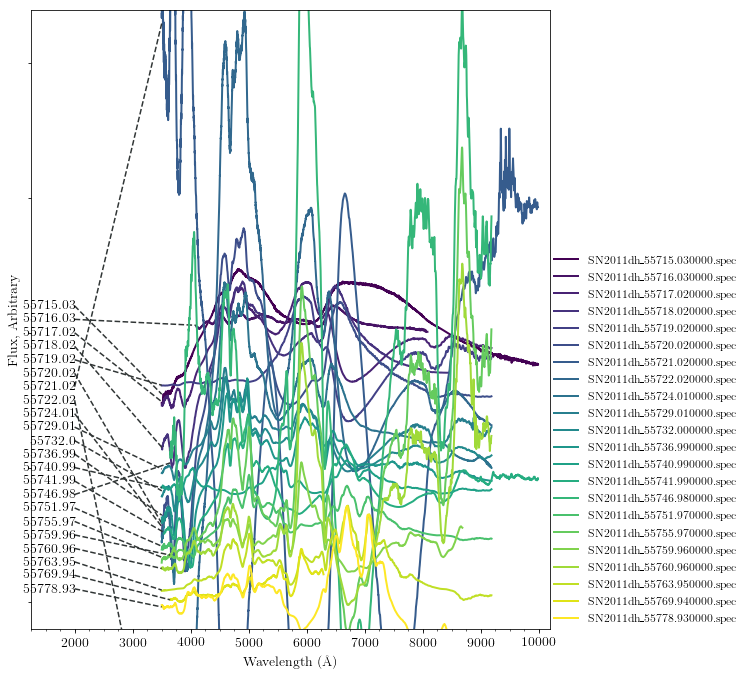

In [110]:
sn.plot_mangledspec()

In [113]:
snname = "SN2009er"## poor fit in B, r, i

sn = pcc.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec()

/Users/berto/Code/CoCo/data/lc/SN2009er.dat
SN2009er
/Users/berto/Code/CoCo/recon/SN2009er_54977.180000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54977.180000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54978.150000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54978.150000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54980.080000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54980.080000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54981.040000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54981.040000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54982.980000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54982.980000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54984.910000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54984.910000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54997.470000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54997.470000.spec
/Users/berto/Code/CoCo/recon/SN2009er_54998.440000.spec
Reading /Users/berto/Code/CoCo/recon/SN2009er_54998

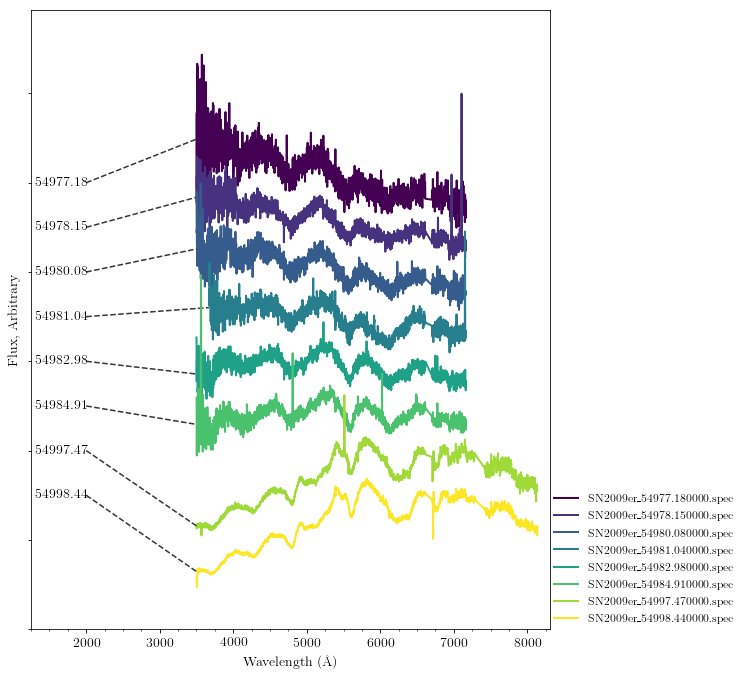

In [114]:
sn.plot_mangledspec()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

27

VARNAMES,ID_OBS,ID_COADD,MJD,BAND,PHOTFLAG,PSF,ZP,SKYSIG,GAIN,FLUX,FLUXERR,IMAGE_NAME_SEARCH,IMAGE_NAME_WEIGHT,FILE_NAME_PSF,IMAGE_NAME_SEARCH+FAKESN,IMAGE_NAME_WEIGHT+FAKESN,SMP_FLUX,SMP_FLUXERR,SMP_FLUX_ZPT,SMP_FIT_ZPT,SMP_FIT_ZPT_STD,SMP_CHISQ,SMP_SKY,SMP_SKYERR,SMP_FIX,SMP_FLAG
str4,float64,float64,float64,str1,int64,float64,float64,float64,float64,float64,float64,str54,str61,str53,str61,str68,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
OBS:,1.0,1.0,56534.233,g,2049,3.34,30.348,7.36,3.22,17.64,7.49,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.weight.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.psf,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36+fakeSN.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36+fakeSN.weight.fits,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999
OBS:,2.0,2.0,56534.235,r,2049,2.84,30.532,11.22,3.6,21.05,8.03,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.weight.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.psf,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36+fakeSN.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36+fakeSN.weight.fits,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999
OBS:,3.0,3.0,56536.241,g,4096,2.46,30.224,8.35,3.37,68.7,6.75,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.weight.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.psf,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36+fakeSN.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36+fakeSN.weight.fits,1702.856,168.282,31.0,31.684,0.002,1.097,-3.9,16.233,0,0
OBS:,4.0,4.0,56536.243,r,1,2.32,29.376,13.68,3.69,37.92,20.9,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.weight.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.psf,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36+fakeSN.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36+fakeSN.weight.fits,944.993,470.841,31.0,30.883,0.004,1.145,-17.679,58.455,0,0
OBS:,5.0,5.0,56536.245,i,1,2.1,29.784,22.1,3.95,54.94,20.38,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.weight.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.psf,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36+fakeSN.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36+fakeSN.weight.fits,1203.222,478.548,31.0,31.347,0.002,0.998,-10.995,63.77,0,0
OBS:,6.0,6.0,56536.252,z,1025,2.1,28.93,30.06,3.96,-8.63,61.59,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.weight.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.psf,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36+fakeSN.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36+fakeSN.weight.fits,6.78,1177.987,31.0,30.513,0.006,1.119,-29.264,192.323,0,0
OBS:,7.0,7.0,56537.22,g,4096,4.53,30.715,8.48,3.4,80.27,9.23,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.weight.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.psf,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36+fakeSN.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36+fakeSN.weight.fits,2387.061,217.252,31.0,32.039,0.004,0.985,-2.353,11.826,0,0
OBS:,8.0,8.0,56537.222,r,4096,3.84,30.789,12.26,3.65,96.85,9.91,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.weight.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.psf,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36+fakeSN.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36+fakeSN.weight.fits,2421.268,233.856,31.0,32.228,0.003,0.943,-3.432,15.385,0,0
OBS:,9.0,9.0,56537.225,i,33,3.59,31.039,21.6,3.91,12.18,94.08,20130901_SN-S1/i_36/SNp1_229664_SN-S1_tile20_i_36.fits,20130901_S

In [33]:

# filenamedat = "/Users/berto/data/DES/des_real_01250017_smp_data.dat"


col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27
str4,int64,int64,float64,str1,int64,float64,float64,float64,float64,float64,float64,str54,str61,str53,str61,str68,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
OBS:,1,1,56534.233,g,2049,3.34,30.348,7.36,3.22,17.64,7.49,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.weight.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36.psf,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36+fakeSN.fits,20130829_SN-S1/g_36/SNp1_228752_SN-S1_tile20_g_36+fakeSN.weight.fits,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999
OBS:,2,2,56534.235,r,2049,2.84,30.532,11.22,3.6,21.05,8.03,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.weight.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36.psf,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36+fakeSN.fits,20130829_SN-S1/r_36/SNp1_228753_SN-S1_tile20_r_36+fakeSN.weight.fits,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999
OBS:,3,3,56536.241,g,4096,2.46,30.224,8.35,3.37,68.7,6.75,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.weight.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36.psf,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36+fakeSN.fits,20130831_SN-S1/g_36/SNp1_229384_SN-S1_tile20_g_36+fakeSN.weight.fits,1702.856,168.282,31.0,31.684,0.002,1.097,-3.9,16.233,0,0
OBS:,4,4,56536.243,r,1,2.32,29.376,13.68,3.69,37.92,20.9,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.weight.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36.psf,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36+fakeSN.fits,20130831_SN-S1/r_36/SNp1_229385_SN-S1_tile20_r_36+fakeSN.weight.fits,944.993,470.841,31.0,30.883,0.004,1.145,-17.679,58.455,0,0
OBS:,5,5,56536.245,i,1,2.1,29.784,22.1,3.95,54.94,20.38,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.weight.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36.psf,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36+fakeSN.fits,20130831_SN-S1/i_36/SNp1_229386_SN-S1_tile20_i_36+fakeSN.weight.fits,1203.222,478.548,31.0,31.347,0.002,0.998,-10.995,63.77,0,0
OBS:,6,6,56536.252,z,1025,2.1,28.93,30.06,3.96,-8.63,61.59,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.weight.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36.psf,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36+fakeSN.fits,20130831_SN-S1/z_36/SNp1_229388_SN-S1_tile22_z_36+fakeSN.weight.fits,6.78,1177.987,31.0,30.513,0.006,1.119,-29.264,192.323,0,0
OBS:,7,7,56537.22,g,4096,4.53,30.715,8.48,3.4,80.27,9.23,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.weight.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36.psf,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36+fakeSN.fits,20130901_SN-S1/g_36/SNp1_229662_SN-S1_tile20_g_36+fakeSN.weight.fits,2387.061,217.252,31.0,32.039,0.004,0.985,-2.353,11.826,0,0
OBS:,8,8,56537.222,r,4096,3.84,30.789,12.26,3.65,96.85,9.91,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.weight.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36.psf,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36+fakeSN.fits,20130901_SN-S1/r_36/SNp1_229663_SN-S1_tile20_r_36+fakeSN.weight.fits,2421.268,233.856,31.0,32.228,0.003,0.943,-3.432,15.385,0,0
OBS:,9,9,56537.225,i,33,3.59,31.039,21.6,3.91,12.18,94.08,20130901_SN-S1/i_36/SNp1_229664_SN-S1_tile20_i_36.fits,20130901_SN-S1/i_36/SNp1_229664_SN-S1_tile20_i_36.weight.fits,20130901_SN-S1/i_36/SNp1_229664_SN-S1_tile20_i_36.psf,20130901_SN-S1/i_36/SNp1_229664_SN-S1_tile20_i_36+fakeSN.fits,20